# Challenge: E-commerce Insights  

### Description:  
Hey friend! Imagine you're a data analyst at an e-commerce company. The marketing team wants to know which products are driving sales, how customer behavior changes over time, and which demographics are most valuable. The problem is, the data is scattered across multiple sources! Your task is to use your Pandas magic to unite the data, answer the marketing team's questions, and become the hero of the company.  

### Tasks:  
- 1: **Product Performance:** Find the top 10 products with the highest total revenue, considering both sales data and product prices. The data includes columns for 'product_id', 'product_price', and 'units_sold'.
- 2: **Customer Journey:** Analyze how customer behavior changes over their first five purchases. The data includes columns for 'customer_id', 'purchase_date', 'product_id', and 'units_sold'.

### Bonus Question:  
- **Demographic Insights:** Calculate the average order value for each age group and gender. The data includes columns for 'customer_id', 'age', 'gender', and 'order_value'.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import sys

In [2]:
print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Numpy version ' + np.__version__)

Python version 3.11.7 | packaged by Anaconda, Inc. | (main, Dec 15 2023, 18:05:47) [MSC v.1916 64 bit (AMD64)]
Pandas version 2.2.1
Numpy version 1.26.4


# The Data

The generated dataset simulates e-commerce data with 3 tables: products, customers, and orders.  

### Column Descriptions:
- **product_id:** unique product identifier  
- **product_price:** product price   
- **customer_id:** unique customer identifier  
- **age:** customer age  
- **gender:** customer gender (male or female)  
- **purchase_date:** order date
- **units_sold:** number of units sold  

In [3]:
# set the seed
np.random.seed(0)

# generate sample products
products = pd.DataFrame({
    'product_id': np.arange(100),
    'product_price': np.random.randint(10, 100, size=100)
})

# customer data
customers = pd.DataFrame({
    'customer_id': np.arange(200, dtype=int),
    'age': np.random.randint(18, 65, size=200),
    'gender': np.random.choice(['M', 'F'], size=200)
})

# sales orders
orders = pd.DataFrame({
    'customer_id': np.random.choice(customers['customer_id'], size=1000),
    'product_id': np.random.choice(products['product_id'], size=1000),
    'purchase_date': pd.date_range('1/1/2022', periods=1000),
    'units_sold': np.random.randint(1, 10, size=1000)    
})

# merge dataframes
data = pd.merge(orders, products, on='product_id')
data = pd.merge(data, customers, on='customer_id')

# introduce missing values
data.loc[data.sample(frac=0.1).index, 'product_price'] = np.nan
data.loc[data.sample(frac=0.05).index, 'gender'] = np.nan

# introduce duplicates
data = pd.concat([data, data.sample(n=50)], ignore_index=True)

data

,customer_id,product_id,purchase_date,units_sold,product_price,age,gender
0,104,52,2022-01-01,1,44.0,62,M
1,91,90,2022-01-02,7,68.0,31,F
2,43,80,2022-01-03,2,78.0,56,F
3,63,46,2022-01-04,5,84.0,20,M
4,159,96,2022-01-05,8,59.0,42,M
...,...,...,...,...,...,...,...
1045,183,16,2022-04-18,8,49.0,36,M
1046,47,55,2023-01-20,5,46.0,58,F
1047,49,98,2024-01-26,1,51.0,48,F
1048,0,46,2022-02-27,5,84.0,18,F


Let's take a look at the datatypes to ensure all of the columns are of the correct type.  

> Take note of the output below, we are also able to see the columns with null values (gender and product_price)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   customer_id    1050 non-null   int32         
 1   product_id     1050 non-null   int32         
 2   purchase_date  1050 non-null   datetime64[ns]
 3   units_sold     1050 non-null   int32         
 4   product_price  945 non-null    float64       
 5   age            1050 non-null   int32         
 6   gender         997 non-null    object        
dtypes: datetime64[ns](1), float64(1), int32(4), object(1)
memory usage: 41.1+ KB


# Missing Values  

To make things simple, we can get rid of the rows that have missing prices as that is an important column and we don't really want to make guesses here. The gender column is a different story. For this tutorial, we are not really doing any kind of filtering by gender (except the bonus question), so for now let us ignore the missing values in the gender column.

In [5]:
# only drop rows where product_price is null 
data = data.dropna(subset='product_price')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 945 entries, 0 to 1049
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   customer_id    945 non-null    int32         
 1   product_id     945 non-null    int32         
 2   purchase_date  945 non-null    datetime64[ns]
 3   units_sold     945 non-null    int32         
 4   product_price  945 non-null    float64       
 5   age            945 non-null    int32         
 6   gender         894 non-null    object        
dtypes: datetime64[ns](1), float64(1), int32(4), object(1)
memory usage: 44.3+ KB


# Duplicates

Let's pretend you took a look at specific duplicate rows and determined they were in fact duplicates and needed to be removed.

In [6]:
# identify the dupes
data[data.duplicated()].sort_values(by=['customer_id','product_id']).head()

,customer_id,product_id,purchase_date,units_sold,product_price,age,gender
1049,0,23,2023-03-07,5,87.0,18,F
1048,0,46,2022-02-27,5,84.0,18,F
1038,3,4,2024-02-29,2,77.0,48,M
1025,7,20,2024-09-07,4,91.0,47,F
1003,7,83,2022-09-23,6,57.0,47,F


In [8]:
# lets look at one of the dupes, yep we should get rid of those dupes
data[(data.loc[:,'customer_id']==0) & (data.loc[:,'product_id']==23)]

,customer_id,product_id,purchase_date,units_sold,product_price,age,gender
430,0,23,2023-03-07,5,87.0,18,F
1049,0,23,2023-03-07,5,87.0,18,F


In [9]:
# drop dupes
data = data.drop_duplicates()

# Product Performance:  

Find the top 10 products with the highest total revenue, considering both sales data and product prices. The data includes columns for 'product_id', 'product_price', and 'units_sold'.

In [10]:
# let's start by calculating the revenue
data.loc[:,'revenue'] = data['product_price'] * data['units_sold']
data

,customer_id,product_id,purchase_date,units_sold,product_price,age,gender,revenue
0,104,52,2022-01-01,1,44.0,62,M,44.0
1,91,90,2022-01-02,7,68.0,31,F,476.0
2,43,80,2022-01-03,2,78.0,56,F,156.0
3,63,46,2022-01-04,5,84.0,20,M,420.0
4,159,96,2022-01-05,8,59.0,42,M,472.0
...,...,...,...,...,...,...,...,...
994,116,67,2024-09-21,3,51.0,41,M,153.0
995,104,30,2024-09-22,6,57.0,62,M,342.0
996,126,37,2024-09-23,1,29.0,58,NaN,29.0
998,116,5,2024-09-25,9,19.0,41,M,171.0


To determine the products with the highest total revenue, we will make use of Pandas groupBy method.  

After I calculated the total revenue per product, I sorted the data from highest to lowest, and then selected the top ten rows.

In [11]:
# create group object
group = data[['product_id','revenue']].groupby('product_id')

# get top ten
group.sum().sort_values(by='revenue', ascending=False).head(10)

,revenue
product_id,
72,6808.0
94,6650.0
17,6111.0
29,5874.0
78,5452.0
11,5194.0
71,5152.0
23,5133.0
43,5092.0


# Customer Journey:  

Analyze how customer behavior changes over their first 5 purchases. The data includes columns for 'customer_id', 'purchase_date', 'product_id', and 'units_sold'.

I wanted to start by looking at the units sold over the dataset. We might be able to see a pattern here, but since we are working with randomly generated data, I don't see much here. Do you?

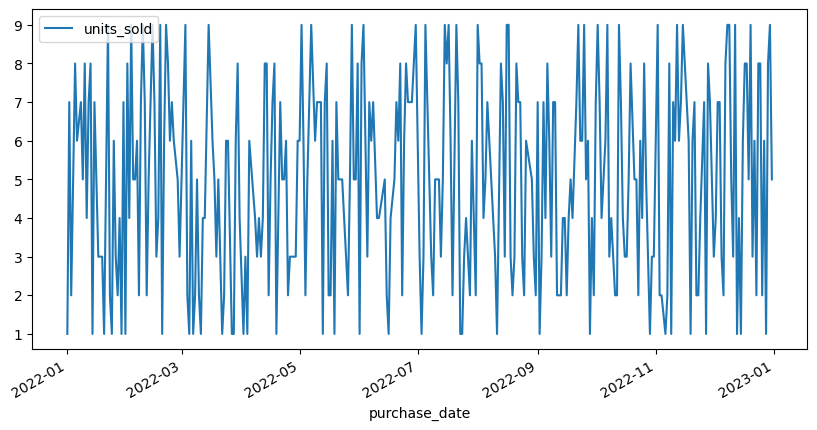

In [12]:
# create group object
group = data[['units_sold','purchase_date']].groupby('purchase_date')

# let's take a peek at the year 2022
group.sum()[:'2022'].plot(figsize=(10, 5));

In [13]:
# create group object
group = data[['units_sold','purchase_date','customer_id']].sort_values(by='purchase_date').groupby(['customer_id'])

def first_five(df):
    ''' return the first 5 '''
    return df.head(5)

# apply the function to each group
top5 = group.apply(first_five, include_groups=False)
top5

units_sold purchase_date
customer_id                              
0           57            5    2022-02-27
            67            5    2022-03-09
            331           8    2022-11-28
            430           5    2023-03-07
            849           6    2024-04-29
...                     ...           ...
199         206           4    2022-07-26
            546           1    2023-07-01
            623           4    2023-09-16
            815           5    2024-03-26
            940           2    2024-07-29

[780 rows x 2 columns]

Now that we have trimmed the data to the first 5 purchases per customer, let's generate the chart again.  

As you can see below, we are still in the same boat. At this point, you may want to further filter the data by gender/age and see if you find any patterns there.

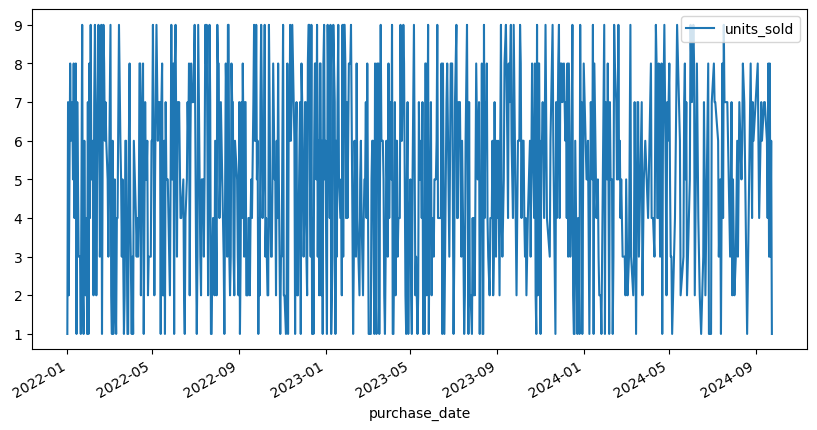

In [14]:
# create group object
group = top5.reset_index()[['units_sold','purchase_date']].groupby('purchase_date')

# let's take a peek at the year 2022
group.sum()[:'2024'].plot(figsize=(10, 5));

# Can You Solve the Bonus Question?  

Calculate the average order value for each age group and gender. The data includes columns for 'customer_id', 'age', 'gender', and 'order_value'.

<p class="text-muted">This tutorial was created by <a href="https://www.hedaro.com" target="_blank"><strong>HEDARO</strong></a></p>